In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [3]:
# Ithaca July precipitation data from Wilks, Newyork, 1951-1980 (inches)
data_series = np.array([4.17,5.61,3.88,1.55,2.30,5.58,5.58,5.14,4.52,1.53,4.24,1.18,3.17,
        4.72,2.17,2.17,3.94,0.95,1.48,5.68,4.25,3.66,2.12,1.24,3.64,8.44,5.20,2.33,2.18,3.43])
years = np.arange(1951,1981,1)

print('Raw Data:', data_series)

Raw Data: [4.17 5.61 3.88 1.55 2.3  5.58 5.58 5.14 4.52 1.53 4.24 1.18 3.17 4.72
 2.17 2.17 3.94 0.95 1.48 5.68 4.25 3.66 2.12 1.24 3.64 8.44 5.2  2.33
 2.18 3.43]


i [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
precip_sort [0.95 1.24 1.53 2.12 2.17 2.3  3.17 3.64 3.88 4.17 4.25 4.72 5.2  5.58
 5.68]
p_x_i)=i/n+1: [0.03225806 0.06451613 0.09677419 0.12903226 0.16129032 0.19354839
 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871 0.38709677
 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871  0.58064516
 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548 0.77419355
 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387 0.96774194]
D_n=|F_n(x)-F(x)| 0.14242352854076468


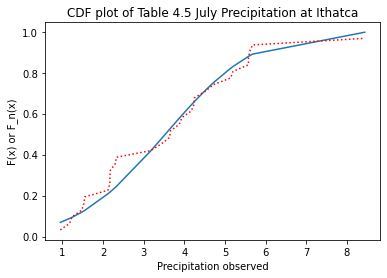

In [17]:
# Aufgabe 5.5 - Kolmogorov Smirnov Test

#print('x',x)
#print(m1.size)
index=np.arange(1,data_series.size+1)
precip_sort=np.sort(data_series)
p_x_i=index/(data_series.size+1)

print('i',index)
print('precip_sort',precip_sort[::2])
print('p_x_i)=i/n+1:',index/(data_series.size+1))
z = (precip_sort - np.mean(precip_sort)) / np.std(precip_sort)
cdf = stats.norm.cdf(z)


ax = plt.axes()
plt.plot(precip_sort,cdf)
plt.plot(precip_sort,p_x_i,color='r',linestyle=':')
#plt.plot(T_sort,T_sort,color='r',linestyle=':')
plt.title('CDF plot of Table 4.5 July Precipitation at Ithatca')
plt.xlabel('Precipitation observed')
plt.ylabel('F(x) or F_n(x)')

#D_n from Kolmogorov-Smirnov Statistics
D_n=np.max(abs(cdf-p_x_i))
print('D_n= Max|F_n(x)-F(x)|',D_n)
#plt.xlim(0,1)
#plt.ylim(0,1)
#ax.xaxis.set_major_locator(plt.MaxNLocator(m1.size/2))
#ax.xaxis.set_major_formatter(plt.FixedFormatter(T_sort[::2]))
#ax.yaxis.set_major_locator(plt.MaxNLocator(m1.size/2))
#ax.yaxis.set_major_formatter(plt.FixedFormatter(T_sort[::2]))

xmin,xmax 0.25 5.75


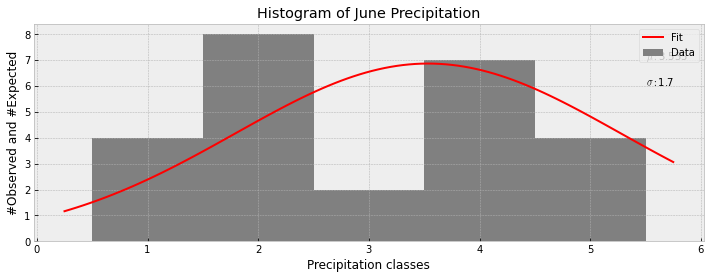

In [76]:
#b Chi square Test



# Aus https://im-coder.com/wie-kann-ich-fit-einer-gauss-kurve-in-python.html
mean,std=norm.fit(data_series)
#norm.fit versucht, passen Sie die Parameter einer Normalverteilung basierend auf den Daten. 
#Und zwar in dem Beispiel oben mean etwa 2 und std ist etwa 5.

#Um die Handlung, die Sie tun können:
with plt.style.context('bmh'):
  
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set(title="Histogram of June Precipitation")
    
    plt.hist(data_series, bins=[0.5,1.5,2.5,3.5,4.5,5.5],color='gray')
    xmin, xmax = plt.xlim()
    print('xmin,xmax',xmin,xmax)
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y*30,color='red')
    plt.legend(['Fit','Data'])
    # Beschriftung hinzufügen
    style = dict(size=10, color='gray')
    ax.text(5.5,7,r"$\mu: $"+f"{mean:.4}")
    ax.text(5.5,6,r"$\sigma: $"+f"{std:.2}")

    plt.xlabel('Precipitation classes')
    plt.ylabel('#Observed and #Expected')
    str()
    plt.show()

In [81]:

counts, edges = np.histogram(data_series,bins=[0.5,1.5,2.5,3.5,4.5,5.5])
x = np.linspace(xmin, xmax, 5)

y = norm.pdf(x, mean, std)
print('counts',counts)
print('edges ',edges)
print('p',y)
print('sum p CDF:,',np.sum(y))
print('n*p_x',y*30)
dev_chi=((counts-y*30))**2/y/30

chi_square=np.sum(dev_chi)

print('dev_square:',dev_chi)
print('Chi_square:',np.sum(dev_chi))

#Probability of Chi Distribution at Chi_square=34
#via Stats package and chi2.pdf
df=bins-2-1 # bins-2-1 (mean,std)
print('stats.chi2.pdf(x, df)')
print('P_chi_sq(34,dof=7)',stats.chi2.pdf(np.sum(dev_chi), df))

#!!! Irgendwas stimmt hier nicht :/

counts [4 8 2 7 4]
edges  [0.5 1.5 2.5 3.5 4.5 5.5]
p [0.03875086 0.12556252 0.21835404 0.203791   0.10207781]
sum p CDF:, 0.6885362220728546
n*p_x [1.16252581 3.76687548 6.55062113 6.11373001 3.06233423]
dev_square: [6.92566106 4.75708402 3.16125024 0.12847713 0.28710684]
Chi_square: 15.259579297654826
stats.chi2.pdf(x, df)
P_chi_sq(34,dof=7) 0.000757017298217181


In [ ]:
# Degrees of freedom = # Classes-#Fit parameter-1
# # Classes = 10
# # Fit parameters = 2 (mean, std)

DOF=3

#Chi square is a special case of Gamma distribtion with alpha=DOF/2 and beta =2
 
alpha = 1.5

# p.values using Table B2 with beta=1
# Standardize the test statisitics  by beta
# Chi Gauss = Chi_square/2 = 15/2= 7.5

#CDF(alpha=1.5,beta=1,Chi_Gauss=7.5) > 0.999

#For the fitted Guassian distribution with chi_gauss=7.5 corresponds to cumulative probability that is substantially
#higher than 0.99, again providing strong evidence that these data were not drawn from this Gaussian distribution.
# The p-values for this test is p=1-CDF< 0.0001 which is in  line with stats.chi2.pdf(x=7.5,df=3)


No handles with labels found to put in legend.


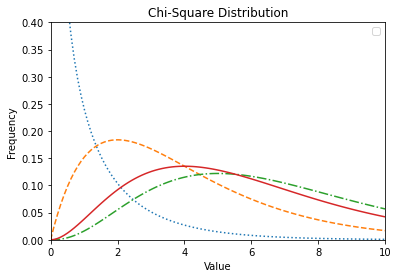

In [24]:

#https://www.tutorialspoint.com/python_data_science/python_chi_square_test.htm
x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()

In [41]:
# Example 5.4 Ithaca January Precipitiation Data Table A2


precip=np.array([0.44,1.18,2.69,2.08,3.66,1.72,2.82,0.72,1.46,1.30,1.35,0.54,2.74,1.13,2.50,1.72,2.27,
       2.82,1.98,2.44,2.53,2,1.12,2.13,1.36,4.90,2.94,1.75,1.69,1.88,1.31,1.76,2.17,2.38,1.16,
       1.39,1.36,1.03,1.11,1.35,1.44,1.84,1.69,3.00,1.36,6.37,4.55,0.52,0.87,1.51])

print(precip)
shape_data=precip.shape
print(shape_data)
n_data=shape_data[0]
print(n_data-12)

[0.44 1.18 2.69 2.08 3.66 1.72 2.82 0.72 1.46 1.3  1.35 0.54 2.74 1.13
 2.5  1.72 2.27 2.82 1.98 2.44 2.53 2.   1.12 2.13 1.36 4.9  2.94 1.75
 1.69 1.88 1.31 1.76 2.17 2.38 1.16 1.39 1.36 1.03 1.11 1.35 1.44 1.84
 1.69 3.   1.36 6.37 4.55 0.52 0.87 1.51]
(50,)
38


xmin,xmax 0.35 3.65


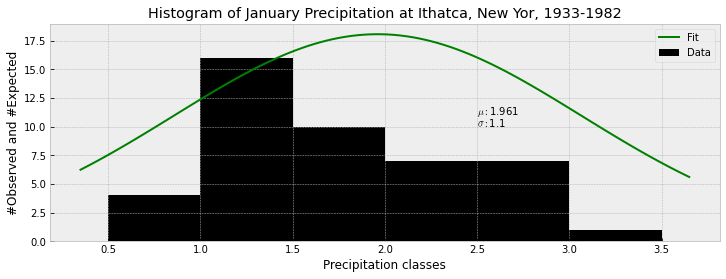

In [61]:
#b Chi square Test



# Aus https://im-coder.com/wie-kann-ich-fit-einer-gauss-kurve-in-python.html
mean,std=norm.fit(precip)
#norm.fit versucht, passen Sie die Parameter einer Normalverteilung basierend auf den Daten. 
#Und zwar in dem Beispiel oben mean etwa 2 und std ist etwa 5.

#Um die Handlung, die Sie tun können:
with plt.style.context('bmh'):
  
    fig, ax = plt.subplots(figsize=(12,4))
    ax.set(title="Histogram of January Precipitation at Ithatca, New Yor, 1933-1982")
    
    plt.hist(precip, bins=[0.5,1,1.5,2,2.5,3,3.5],color='black')
    xmin, xmax = plt.xlim()
    print('xmin,xmax',xmin,xmax)
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y*n_data,color='green')
    plt.legend(['Fit','Data'])
    # Beschriftung hinzufügen
    style = dict(size=10, color='gray')
    ax.text(2.5,11,r"$\mu: $"+f"{mean:.4}")
    ax.text(2.5,10,r"$\sigma: $"+f"{std:.2}")

    plt.xlabel('Precipitation classes')
    plt.ylabel('#Observed and #Expected')
    str()
    plt.show()

In [70]:
bins=6
counts, edges = np.histogram(precip,bins=[0.5,1,1.5,2,2.5,3,3.5])
x = np.linspace(xmin, xmax, 6)

y = norm.pdf(x, mean, std)
print('counts',counts)
print('edges ',edges)
print('p',y)
print('sum p CDF:,',np.sum(y))
print('n*p_x',y*n_data)
dev_chi=((counts-y*n_data))**2/y/n_data

chi_square=np.sum(dev_chi)

print('dev_square:',dev_chi)
print('Chi_square:',np.sum(dev_chi))

#Probability of Chi Distribution at Chi_square=34
#via Stats package and chi2.pdf
df=bins-2-1 # bins-2-1 (mean,std)
print('stats.chi2.pdf(x, df)')
print('p_values: P_chi_sq(34,dof=7)',stats.chi2.pdf(np.sum(dev_chi), df))



counts [ 4 16 10  7  7  1]
edges  [0.5 1.  1.5 2.  2.5 3.  3.5]
p [0.12475948 0.24939008 0.34886272 0.34150709 0.23394548 0.11215003]
sum p CDF:, 1.4106148741934297
n*p_x [ 6.23797398 12.46950385 17.44313586 17.0753545  11.69727418  5.60750134]
dev_square: [0.80290934 0.99959094 3.17604999 5.94498746 1.88628431 3.78583389]
Chi_square: 16.595655915517145
stats.chi2.pdf(x, df)
P_chi_sq(34,dof=7) 0.00040476819759780635


In [ ]:
# Degrees of freedom = # Classes-#Fit parameter-1
# # Classes = 6
# # Fit parameters = 2 (mean, std)

DOF=3

#Chi square is a special case of Gamma distribtion with alpha=DOF/2 and beta =2
 
alpha = 1.5

# p.values using Table B2 with beta=1
# Standardize the test statisitics  by beta
# Chi Gauss = Chi_square/2 = 16/2= 8

#CDF(alpha=1.5,beta=1,Chi_Gauss=8) > 0.999

#For the fitted Guassian distribution with chi_gauss=8 corresponds to cumulative probability that is substantially
#higher than 0.99, again providing strong evidence that these data were not drawn from this Gaussian distribution.
# The p-values for this test is p=1-CDF< 0.0001 which is in  line with stats.chi2.pdf(x=34,df=7)=0.000405
